<a href="https://www.kaggle.com/code/abdelrahmanwael1029/kmeans?scriptVersionId=152752817" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/xclara/xclara.csv


In [2]:
df = pd.read_csv('/kaggle/input/xclara/xclara.csv')
df

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729
...,...,...
2995,85.652800,-6.461061
2996,82.770880,-2.373299
2997,64.465320,-10.501360
2998,90.722820,-12.255840


In [3]:
df.describe()

,V1,V2
count,3000.000000,3000.000000
mean,40.611358,22.862141
std,25.859054,31.759714
min,-22.495990,-38.795500
25%,18.462790,-4.003494
50%,41.552210,13.827390
75%,62.249480,55.729100
max,104.376600,87.313700


In [4]:
df.isnull().sum()

V1    0
V2    0
dtype: int64

<Axes: xlabel='V1', ylabel='V2'>

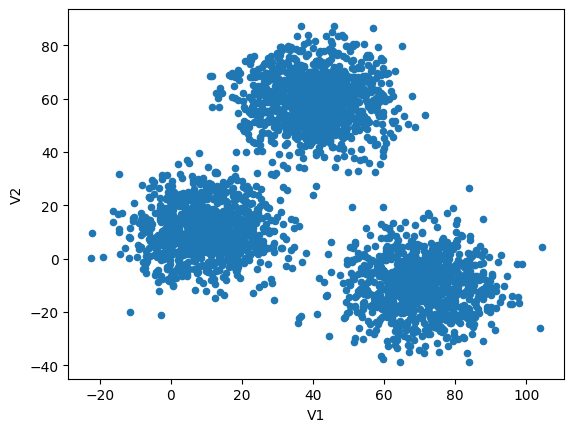

In [5]:
df.plot(kind="scatter", x = 'V1', y = 'V2')

## kMeans

In [6]:
model = KMeans(n_clusters=3)
model.fit(df)
y = model.predict(df)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='V1', ylabel='V2'>

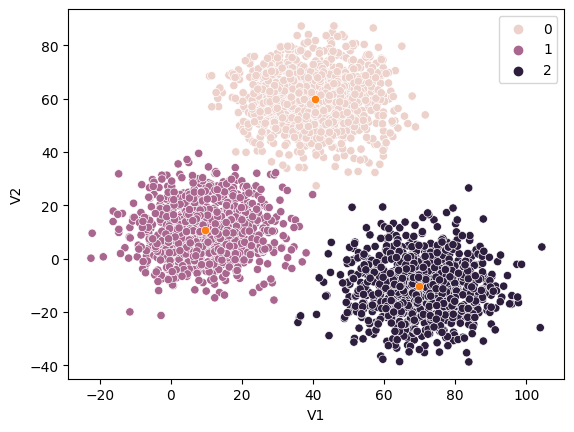

In [7]:

sns.scatterplot(x= df.iloc[:, 0],y= df.iloc[:, 1],hue = y)
sns.scatterplot(x = model.cluster_centers_[:, 0],y = model.cluster_centers_[:, 1])

In [8]:
from sklearn.metrics import silhouette_score
silhouette_score(df, model.labels_)

0.6945587736089913

## hierarchical

In [9]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3)
hc.fit(df)
y_pred = hc.labels_

<Axes: xlabel='V1', ylabel='V2'>

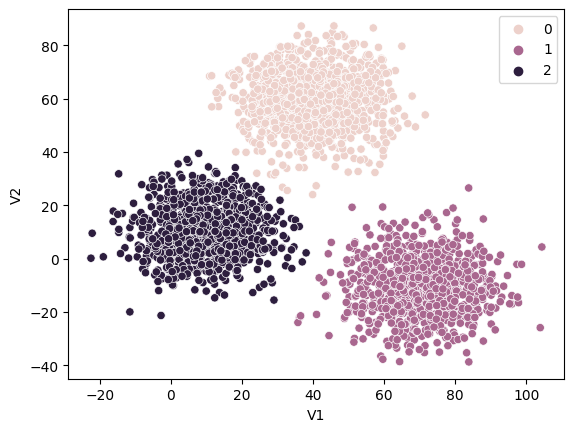

In [10]:
sns.scatterplot(x= df.iloc[:, 0],y= df.iloc[:, 1],hue = y_pred)
# draw center of clusters

In [11]:
silhouette_score(df, y_pred)

0.6941949594065251

## DBSCAN

In [12]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=6, min_samples=11)
dbscan.fit(df)
y_pred = dbscan.labels_


<Axes: xlabel='V1', ylabel='V2'>

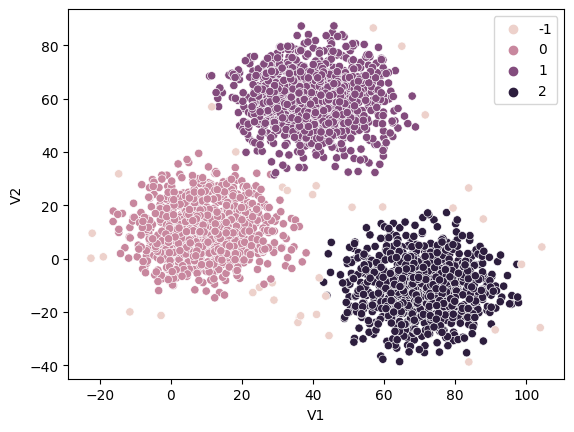

In [13]:
sns.scatterplot(x= df.iloc[:, 0],y= df.iloc[:, 1],hue = y_pred)

In [14]:
# error by silhouette_score
silhouette_score(df, y_pred)


0.6605755505500106